# GEOL 7720 - Exercise 8
### November 27$^{th}$

### Ian Deniset

## Problem
Calculate the Z-Transform of a simple five element wavelet and design a ten element Wiener inverse filter.

## Theory
Deconvolution can be posed as a simple inverse filtering problem:

$D(\omega)=S(\omega)G(\omega)$

$G(\omega)=\frac{D(\omega)}{S(\omega)}$

$g(t)=s^{-1}(t)*d(t)$

where $g(t)$ is the Green's function, and $s(t)$ is the source function or wavelet.

This means that deconvolution can be accomplished by designing a filter as close to the inverse of the source time function as possible and subsequently convolving it with the data.  For sampled data, this can be achieved by calculating and convolving the z-transform dipole inverses of the wavelet.  However, this method does not work well in the presence of non minimum phase data and noise since some dipoles may not an inverse. 

## Solution
### Z-Transform the Wavelet and Find Dipoles:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### The initial wavelet:
The initial five element wavelet is:

$w=[-1.5,-1.25,7.5,5,-6]$

In [2]:
wavelet = np.array([-1.5,-1.25,7.5,5,-6])
print('The initial wavelet is: ', wavelet)

The initial wavelet is:  [-1.5  -1.25  7.5   5.   -6.  ]


#### Z-Transform the Wavelet:
The z-transform of the wavelet is:

$W(Z)=-1.5 -1.25z+7.5z^2+5z^3-6z^4$

#### Determine Zeros:
The zeros of the z-transformed wavelet can be found numerically:

In [3]:
zCoeff = np.asarray([-6,5,7.5,-1.25,-1.5])
zeros = np.roots(zCoeff)
print('The zeros of the wavelet are: ', zeros)

The zeros of the wavelet are:  [ 1.5         0.5        -0.66666667 -0.5       ]


Writing the zeros out in terms of the z-domain gives:

$W(z) = A(z-\frac{3}{2})(z-\frac{1}{2})(z+\frac{2}{3})(z+\frac{1}{2})$

where $A$ is the amplitude obtained through expansion:


$W(z)= A(z-\frac{3}{2})(z-\frac{1}{2})(z+\frac{2}{3})(z+\frac{1}{2})$

$=A\big[z^4-\frac{5}{6}z^3-\frac{5}{4}z^2+\frac{5}{24}z+\frac{1}{4}\big]$

$=-\frac{3}{2} -\frac{5}{4}z+\frac{15}{2}z^2+5z^3-6z^4$


giving an amplitude value, $A$, of $-6$:

$W(z) = -6(z-\frac{3}{2})(z-\frac{1}{2})(z+\frac{2}{3})(z+\frac{1}{2})$

This has the normalized form of:

$W(z)=-\frac{3}{2}(1-\frac{2}{3}z)(1-2z)(1+\frac{3}{2}z)(1+2z)$

Since some coefficients are less than or equal to 1, while others are greater than 1, the wavelet is mixed phase.  This can be better visualized by plotting since minimum phase dipoles plot outside the unit circle in the complex plane while maximum phase dipoles plot inside.


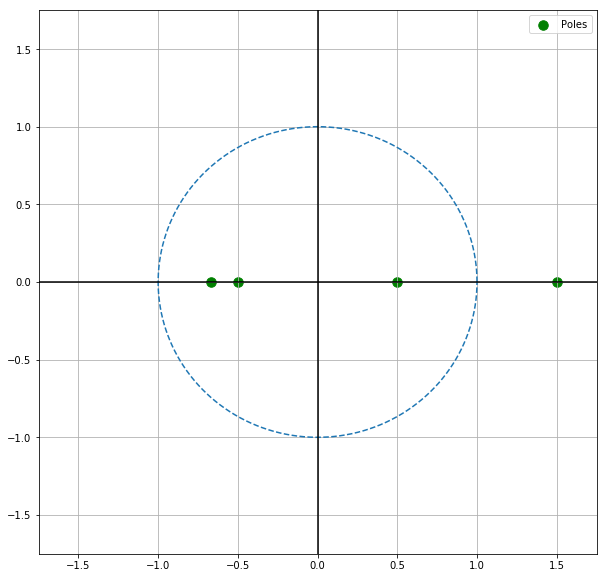

In [4]:
t = np.arange(0,2*np.pi,0.001)

fig, ax = plt.subplots(figsize=(10,10))

ax.plot(np.cos(t), np.sin(t),ls='--')
ax.axhline(y=0,c='k')
ax.axvline(x=0,c='k')
ax.scatter(zeros,[0,0,0,0],c='g',s=90, label='Poles')

ax.legend()
ax.set_xlim(-1.75,1.75)
ax.set_ylim(-1.75,1.75)
ax.grid()
plt.show()

With the dipoles and associated phase found, the inverse of each can be written out as a series expansion to investigate convergence:

##### Zero of 3/2:
$(z-\frac{3}{2})^{-1}=-\frac{1}{a}-\frac{z}{a^2}-\frac{z^2}{a^3}...$

$=-\frac{1}{3/2}-\frac{1}{3/2^2}-\frac{1}{3/2^3}-\frac{1}{3/2^4}-\frac{1}{3/2^5}-\frac{1}{3/2^6}...=-0.66-0.44-0.29-0.19-0.13-0.087...$

##### Zero of 1/2:
$(z-\frac{1}{2})^{-1}=z^{-1}+az^{-2}+a^2z^{-3}+a^3z^{-4}...$

$=1^{-1}+\frac{1}{2}1^{-2}+\frac{1}{2}^{2}1^{-3}...=1+0.5+0.25+0.125+0.0625+0.0312...$

##### Zero of -2/3:
$(z-\frac{2}{3})^{-1}=z^{-1}+az^{-2}+a^2z^{-3}+a^3z^{-4}...$

$=1^{-1}+-\frac{2}{3}1^{-2}+-\frac{2}{3}^{2}1^{-3}...=1-0.66+0.44-0.29+0.19-0.13+0.087...$

##### Zero of -1/2:
$(z-\frac{1}{2})^{-1}=z^{-1}+az^{-2}+a^2z^{-3}+a^3z^{-4}...$

$=1^{-1}+-\frac{1}{2}1^{-2}+-\frac{1}{2}^{2}1^{-3}...=1-0.5+0.25-0.125+0.0625-0.0312...$


As can be seen above, since the zeros for this wavelet lie close to the unit circle, convergence for each dipole is somewhat slow.

## Wiener Filtering

To avoid the issue of minimum and maximum phase dipoles as well as problems with slow convergence, a Wiener filtering approach can be used to find the inverse of a wavelet.  The inverse filter is obtained through a damped least squares inversion of the form:


$\begin{bmatrix} w_0 & 0 & \cdots & 0 & 0 \\
w_1 & w_0 & \cdots & 0 & 0 \\ 
w_2 & w_1 & \cdots & 0 & 0 \\ 
\vdots & \vdots & \ddots & \vdots & \vdots \\
0 & 0 & \cdots & w_m & w_{m-1} \\
0 & 0 & \cdots & 0 & w_m \end{bmatrix} 
\begin{bmatrix} f_0 \\ f_1 \\ \vdots \\ f_n \end{bmatrix}
=
\begin{bmatrix} 1 \\ 0\\ 0 \\ \vdots \\ 0 \end{bmatrix}$

where $w$ is the wavelet, $f$ is the desired inverse filter, and the right hand side is an impulse response containing a single spike.  The location of the spike can be moved in order to handle acausality.

Using the above formulation, a ten point inverse filter for the initial wavelet can be found:

###### Create Wavelet Matrix:

In [5]:
#parameters 
filterLen = 10
waveletLen = len(wavelet)
numRows = filterLen + (waveletLen-1)

#create the wavelet matrix and ensure it is the correct size
waveletMatrix = np.zeros((numRows,filterLen))

col = 0
for row in range(filterLen):
    waveletMatrix[row:(row+5),col]=wavelet
    col += 1
    
print('The shape of the wavelet matrix is :', waveletMatrix.shape)
print('\nThe wavelet matrix is of the form: \n', waveletMatrix)

The shape of the wavelet matrix is : (14, 10)

The wavelet matrix is of the form: 
 [[-1.5   0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [-1.25 -1.5   0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 7.5  -1.25 -1.5   0.    0.    0.    0.    0.    0.    0.  ]
 [ 5.    7.5  -1.25 -1.5   0.    0.    0.    0.    0.    0.  ]
 [-6.    5.    7.5  -1.25 -1.5   0.    0.    0.    0.    0.  ]
 [ 0.   -6.    5.    7.5  -1.25 -1.5   0.    0.    0.    0.  ]
 [ 0.    0.   -6.    5.    7.5  -1.25 -1.5   0.    0.    0.  ]
 [ 0.    0.    0.   -6.    5.    7.5  -1.25 -1.5   0.    0.  ]
 [ 0.    0.    0.    0.   -6.    5.    7.5  -1.25 -1.5   0.  ]
 [ 0.    0.    0.    0.    0.   -6.    5.    7.5  -1.25 -1.5 ]
 [ 0.    0.    0.    0.    0.    0.   -6.    5.    7.5  -1.25]
 [ 0.    0.    0.    0.    0.    0.    0.   -6.    5.    7.5 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.   -6.    5.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   -6.  ]]


###### Set up inverse problem with damping and solve
An initial first past inversion can be completed to investigate the impact of different damping weights and spike locations.

Each calculated inverse filter will be convolved with the original wavelet to investigate how well the original impulse response series is recovered.

In [6]:
#damping values to try
dampVal = np.asarray([0.001,0.01,0.1,1.0,10,100])

filterDamp = []

for dampingV in range(len(dampVal)):
    for spikeLoc in range(8):
        eyeDamp = dampVal[dampingV]*np.identity(len(waveletMatrix[0,:]))
        augA = np.concatenate((waveletMatrix,eyeDamp))
        #print(augA.shape)
    
        #set spike location
        response = np.zeros((numRows,1))
        response[spikeLoc] = 1
        #print(spikeLoc)
        
        zeros = np.zeros((len(waveletMatrix[0,:]),1))
        augD = np.concatenate((response,zeros))
        #print(augD.shape)
    
        ans = np.linalg.lstsq(augA,augD)
        filterDamp.append(ans[0])

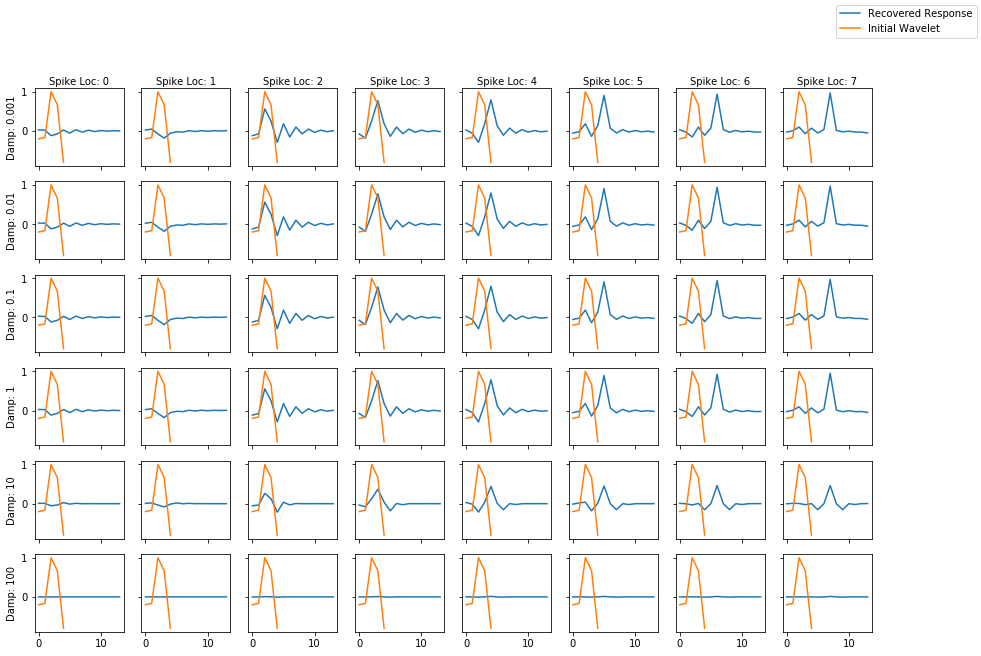

In [7]:
#plot the resulting models
fig, ax = plt.subplots(6,8,figsize=(15,10))
i=0
for row in range(6):
    for col in range(8):
        ax[row,col].plot(np.convolve(wavelet,filterDamp[i][:,0]), label='Recovered Response')
        ax[row,col].plot(wavelet/7.5, label='Initial Wavelet')
        
        if col > 0:
            ax[row,col].set_yticklabels([])
        if row < 5:
            ax[row,col].set_xticklabels([])
        if col == 0:
            ax[row,col].set_ylabel('Damp: %g' %dampVal[row])
        if row == 0:
            ax[row,col].set_xlabel('Spike Loc: %g' %col)
            ax[row,col].xaxis.set_label_position('top')
        
        i+=1
        
fig.legend()        
plt.show()

Looking at the above plots it can be seen that only a small amount of damping is required, and that due to the mostly maximum phase nature of the wavelet, the spike location is best placed at some point after the first sample to allow for acausality.

With a general idea of the best parameters to use, a second inversion can be run to further refine the result.

In [8]:
#damping values to try
dampVal = np.asarray([0.001,0.01,0.1,1.0])

filterDamp = []

for dampingV in range(len(dampVal)):
    for spikeLoc in range(6):
        eyeDamp = dampVal[dampingV]*np.identity(len(waveletMatrix[0,:]))
        augA = np.concatenate((waveletMatrix,eyeDamp))
        #print(augA.shape)
    
        #set spike location
        response = np.zeros((numRows,1))
        response[spikeLoc+3] = 1
        #print(spikeLoc)
        
        zeros = np.zeros((len(waveletMatrix[0,:]),1))
        augD = np.concatenate((response,zeros))
        #print(augD.shape)
    
        ans = np.linalg.lstsq(augA,augD)
        filterDamp.append(ans[0])

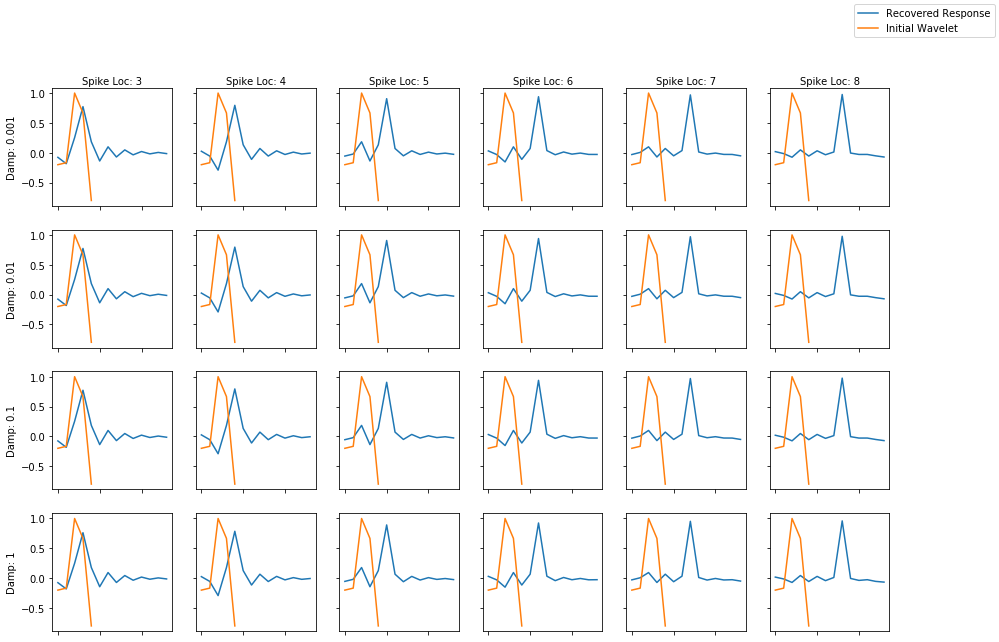

In [9]:
#plot the resulting models
fig, ax = plt.subplots(4,6,figsize=(15,10))
i=0
for row in range(4):
    for col in range(6):
        ax[row,col].plot(np.convolve(wavelet,filterDamp[i][:,0]), label='Recovered Response')
        ax[row,col].plot(wavelet/7.5, label='Initial Wavelet')
        
        if col > 0:
            ax[row,col].set_yticklabels([])
        if row < 5:
            ax[row,col].set_xticklabels([])
        if col == 0:
            ax[row,col].set_ylabel('Damp: %g' %dampVal[row])
        if row == 0:
            ax[row,col].set_xlabel('Spike Loc: %g' %(col+3))
            ax[row,col].xaxis.set_label_position('top')
        
        i+=1
        
fig.legend()        
plt.show()

Visually, there appears to be almost no difference between the recovered response based on damping value alone.  On the other hand, the location of the spike significantly influences the response, with a spike placed at the sixth sample point giving the highest recovered amplitude and reasonably flat side lobes. Based on this, a damping value of 1 and spike location of 6 will be selected as the final parameters for the inverse filter.  The results for these values along with the final inverse filter are plotted in more detail below.

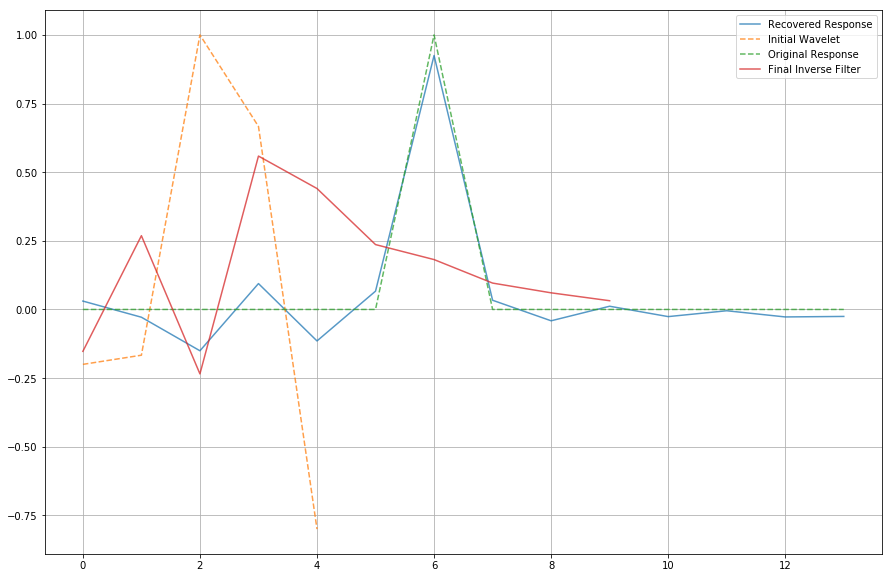

In [10]:
response[6]=1
response[8]=0

fig, ax = plt.subplots(figsize=(15,10))

ax.plot(np.convolve(wavelet,filterDamp[21][:,0]), label='Recovered Response', alpha=0.75)
ax.plot(wavelet/7.5, label='Initial Wavelet', alpha=0.75, ls='--')
ax.plot(response, label='Original Response', alpha=0.75, ls='--')
ax.plot(filterDamp[21][:,0]*7.5, label='Final Inverse Filter', alpha=0.75)
ax.grid(which='both')

plt.legend()
plt.show()